# Introduction

In this project, we are going to explore a dataset for a medical insurance company and predict the insurance cost for an individual.
The following features are available along with target variable for analysis:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
  objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

We will explore the data and relations with insurance cost, 2 models will be developed one with Linear Regression and other with XGBoostRegressor and compare the performance of 2 models.


In [423]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle
sns.set_theme(style="darkgrid")
%matplotlib inline

# Data

## Collection

In [424]:
# load data to a pandas dataframe
df = pd.read_csv("dataset/insurance.csv")

## Assess

In [425]:
# shape of the data

df.shape

(1338, 7)

In [426]:
# view the content of dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [427]:
# view the data type and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [428]:
# view the statistics of data

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [429]:
# check for duplicated values

sum(df.duplicated())

1

## Quality

* There are no missing values in the dataset
* We dont observe any outlier
* Label Encoding needs to be done for sex, smoker and region
* Duplicate rows need to be removed

## Clean

In [430]:
# creating a copy of a dataframe

df_clean = df.copy()

##### label encoding to be done for sex, smoker, region

### Define

Encode labels for sex, smoker and region

### Code

In [431]:
# initializing label encoder
le = LabelEncoder()

In [432]:
# transforming for sex
df_clean['sex']= le.fit_transform(df_clean['sex'])

In [433]:
# transforming for sex
df_clean['smoker']= le.fit_transform(df_clean['smoker'])

In [434]:
# transforming for sex
df_clean['region']= le.fit_transform(df_clean['region'])

### Test

In [435]:
# check for sex column

print(df['sex'].unique())
print(df_clean['sex'].unique())

['female' 'male']
[0 1]


* 0: Female
* 1: Male

In [436]:
# test for smoker column

print(df['smoker'].unique())
print(df_clean['smoker'].unique())

['yes' 'no']
[1 0]


* 0 : No
* 1 : Yes

In [437]:
# test for smoker column

print(df['region'].unique())
print(df_clean['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']
[3 2 1 0]


* 0 : northeast
* 1 : northwest
* 2 : southeast
* 3 : southwest

##### drop duplicate rows

### Define

Drop Duplicate rows

### Code

In [438]:
df_clean.drop_duplicates(keep='first', inplace=True)

### Test

In [439]:
# check for duplicated values

sum(df_clean.duplicated())

0

### Saving Dataframe

In [440]:
# Saving the dataframe to new_insurance
df_clean.to_csv("dataset/new_insurance.csv", index=False)

### Since we have completed our data wrangling now we will start with analysis and visualization.

In [441]:
# load our cleaned dataset
df = pd.read_csv('dataset/new_insurance.csv')

In [442]:
# shape of dataset
df.shape

(1337, 7)

In [443]:
#checking basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.2 KB


### Structure of the dataset

> There are 1337 individuals in the dataset with 5 features like age, sex, bmi, children, smoker, region. All variables are numeric in the dataset.

### Main feature(s) of interest in the dataset

> We are intreseted in checking the relation of different features among themselves and insurance cost.

## Univariate Exploration

### Distribution of age

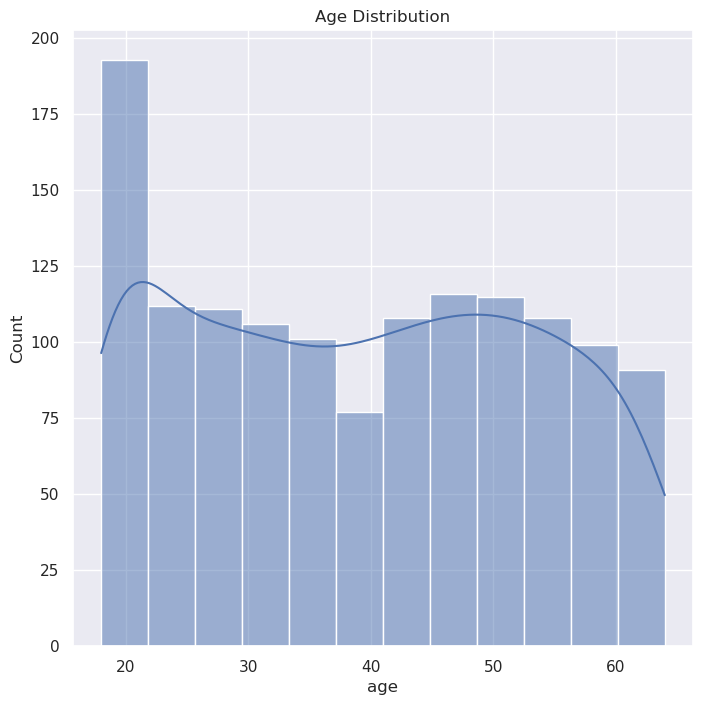

In [444]:
plt.figure(figsize=(8,8))
plt.title("Age Distribution")
sns.histplot(data=df, x='age', kde=True, alpha=0.5)
plt.show()

**From above plot we are able to observe that people in their early 20 are applying more for insurance policy.**

### Gender opting for medical insurance

In [445]:
#creating a new dataframe
gender_type_df = df.groupby('sex').agg({'age':'count'})

gender_type_df['perc'] = (gender_type_df['age']/gender_type_df['age'].sum())*100

gender_type_df

,age,perc
sex,,
0,662,49.513837
1,675,50.486163


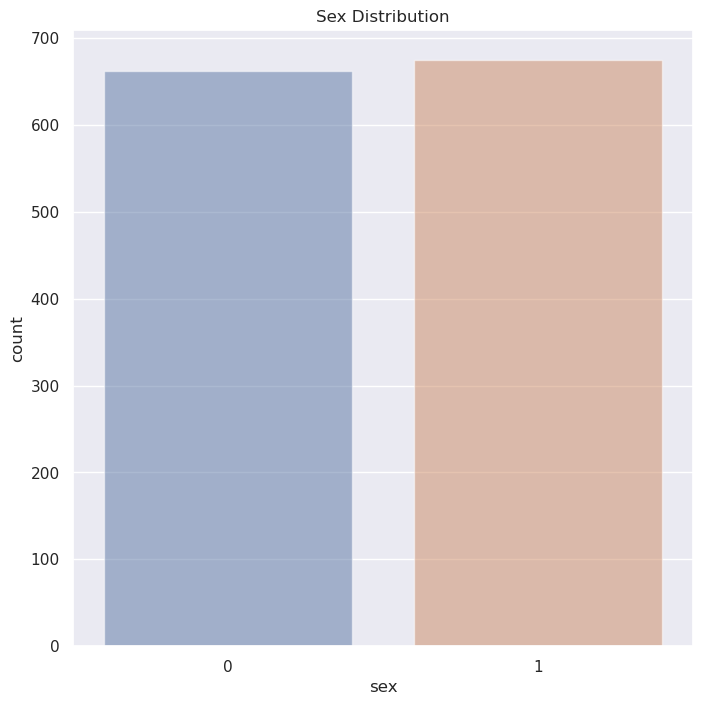

In [446]:
plt.figure(figsize=(8,8))
plt.title("Sex Distribution")
sns.countplot(data=df, x='sex', alpha=0.5)
plt.show()

**From the above plot we can clearly see that males(50.5%) as well as females(49.5%) are opting for medical insurance.**

### Distribution of BMI

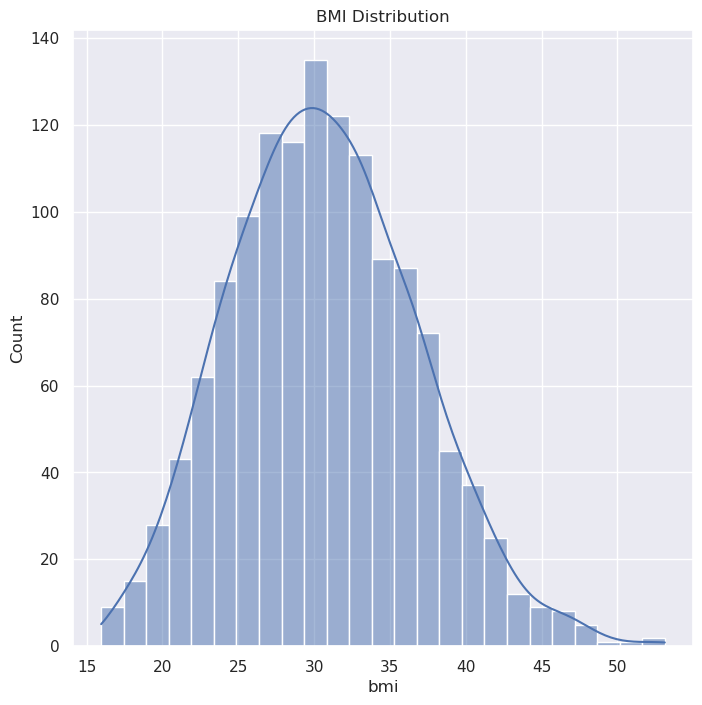

In [447]:
plt.figure(figsize=(8,8))
plt.title("BMI Distribution")
sns.histplot(data=df, x='bmi', kde=True, alpha=0.5)
plt.show()

**From the above plot it is evident the average is in the range of 30**

### Distribution of Children

In [448]:
#creating a new dataframe
children_df = df.groupby('children').agg({'age':'count'})

children_df['perc'] = (children_df['age']/children_df['age'].sum())*100

children_df

,age,perc
children,,
0,573,42.857143
1,324,24.233358
2,240,17.950636
3,157,11.742708
4,25,1.869858
5,18,1.346298


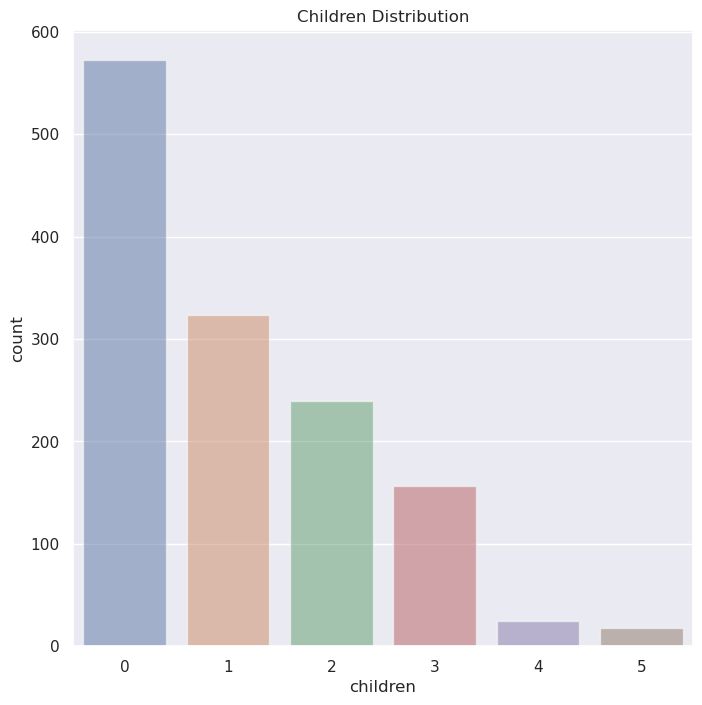

In [449]:
plt.figure(figsize=(8,8))
plt.title("Children Distribution")
sns.countplot(data=df, x='children', alpha=0.5)
plt.show()

From the plot it is clear that:

* 42.8% have 0 children

* 24.2% have 1 child

* 17.95% have 2 childrens

* 11.74% have 3 childrens

* 1.86% have 4 childrens

* 1.34% have 5 childrens

### Smoker Distribution

In [450]:
#creating a new dataframe
smoker_df = df.groupby('smoker').agg({'age':'count'})

smoker_df['perc'] = (smoker_df['age']/smoker_df['age'].sum())*100

smoker_df

,age,perc
smoker,,
0,1063,79.506358
1,274,20.493642


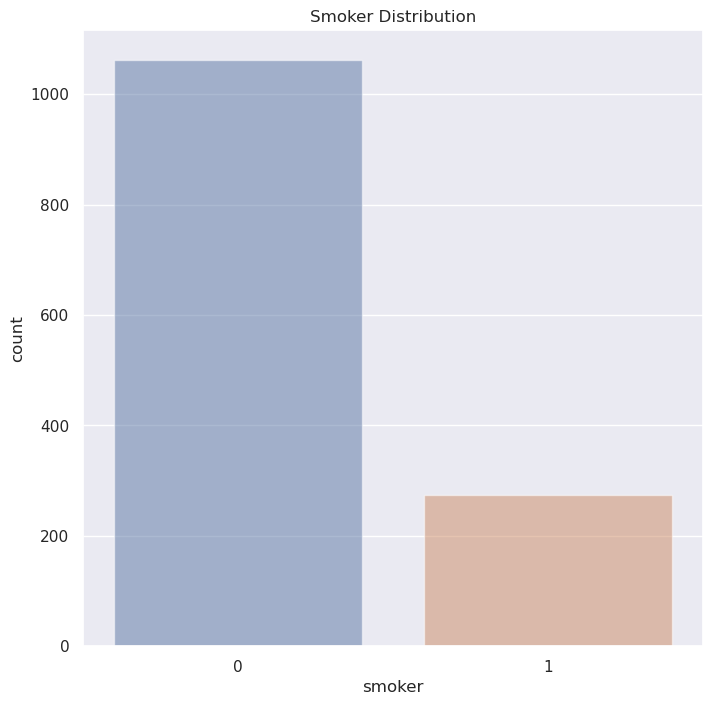

In [451]:
plt.figure(figsize=(8,8))
plt.title("Smoker Distribution")
sns.countplot(data=df, x='smoker', alpha=0.5)
plt.show()

**From the plot it is evident that 79.5% are non smokers.**

### Region Distribution

In [452]:
#creating a new dataframe
region_df = df.groupby('region').agg({'age':'count'})

region_df['perc'] = (region_df['age']/region_df['age'].sum())*100

region_df

,age,perc
region,,
0,324,24.233358
1,324,24.233358
2,364,27.225131
3,325,24.308153


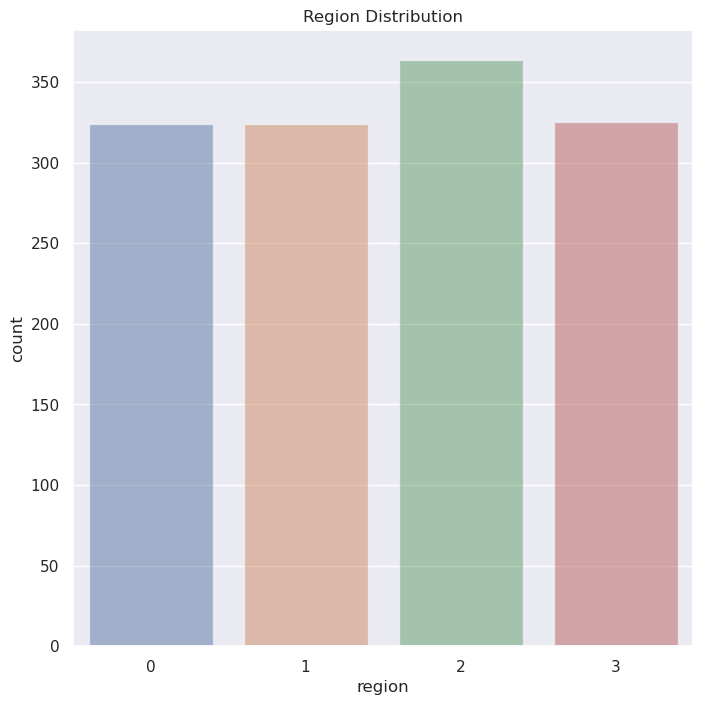

In [453]:
plt.figure(figsize=(8,8))
plt.title("Region Distribution")
sns.countplot(data=df, x='region', alpha=0.5)
plt.show()

**From the plot it is clear that there is an almost equal distribution of individuals from all 4 regions.**

## Bivariate Exploration

### Relation between Age and Gender

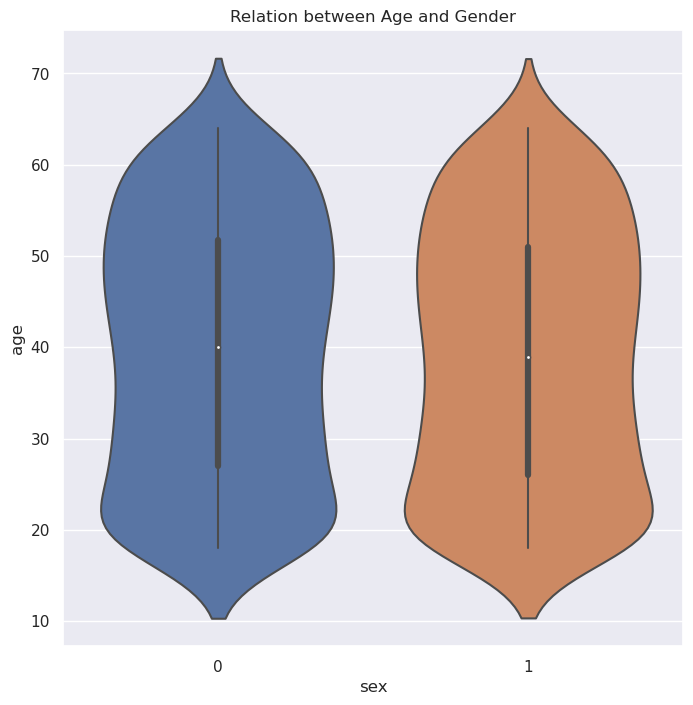

In [454]:
plt.figure(figsize=(8,8))
plt.title("Relation between Age and Gender")
sns.violinplot(data = df, x = 'sex', y = 'age')
plt.show()

**From the plot we see that there is an equal distribution of males and females among all age range.**

### Relation between Age and BMI

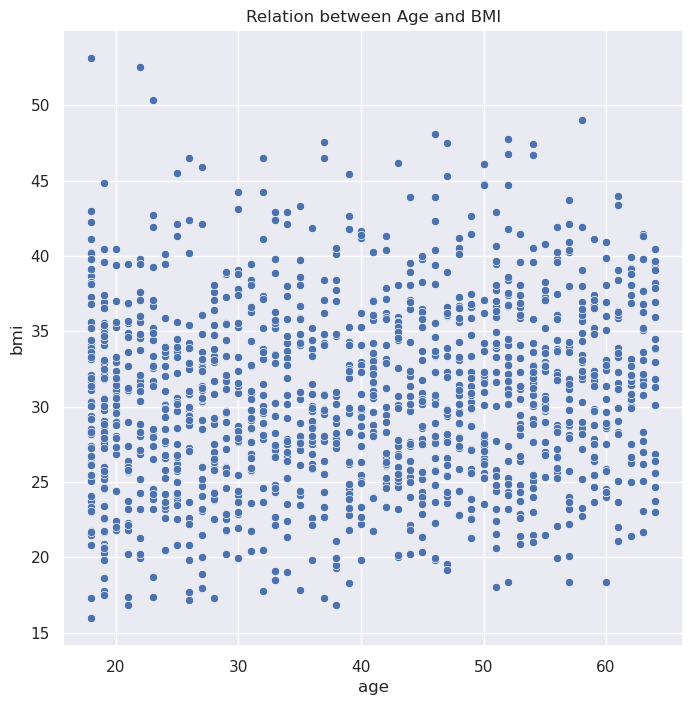

In [455]:
plt.figure(figsize=(8,8))
plt.title("Relation between Age and BMI")
sns.scatterplot(data = df, x = 'age', y = 'bmi')
plt.show()

**From the above plot we can see that BMI for individuals of age 20 lie between 15 to 60 and as the age increases the range of BMI keeps dicreaseing.**

### Relation between Age and Smoker

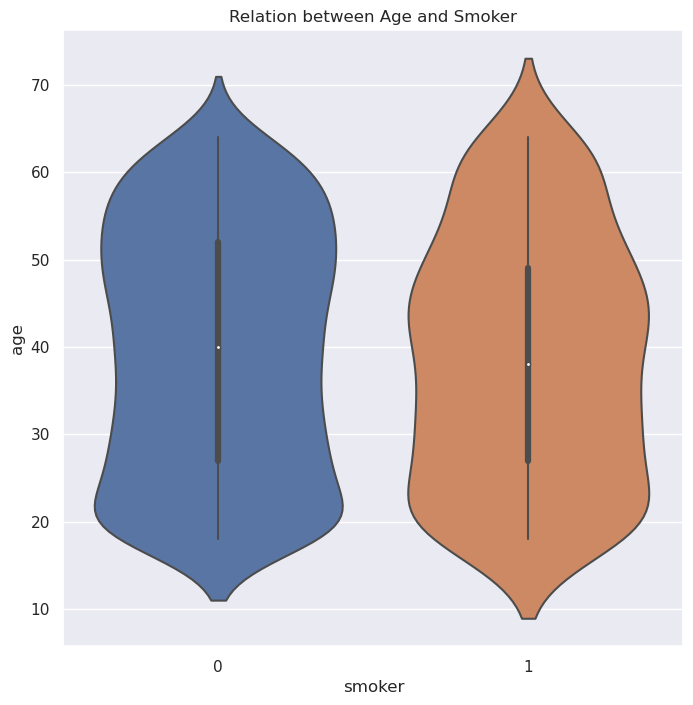

In [456]:
plt.figure(figsize=(8,8))
plt.title("Relation between Age and Smoker")
sns.violinplot(data=df, x='smoker', y='age')
plt.show()

**From the plot we can see smokers in all age group.**

### Relation between Sex and BMI

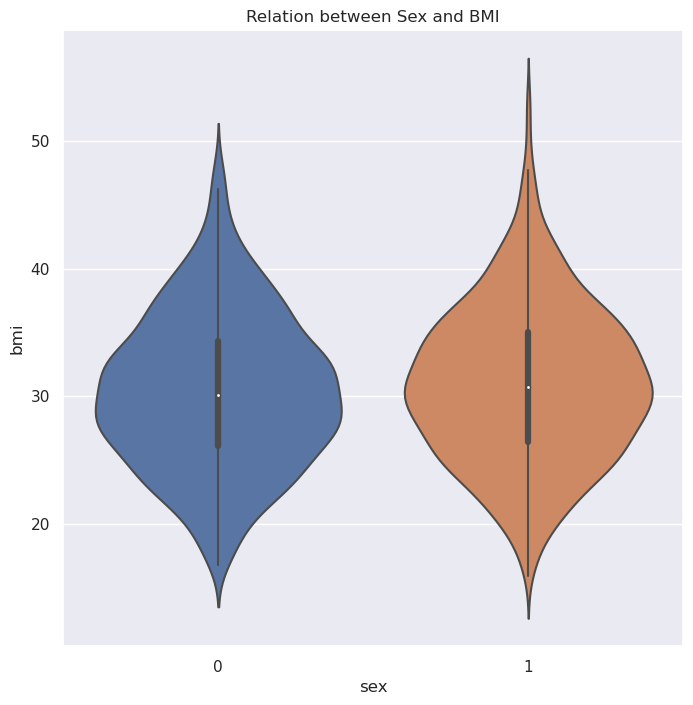

In [457]:
plt.figure(figsize=(8,8))
plt.title("Relation between Sex and BMI")
sns.violinplot(data=df, x='sex', y='bmi')
plt.show()

**The BMI tends to be lower for females as compared to females**

### Relation between Sex and Smoker

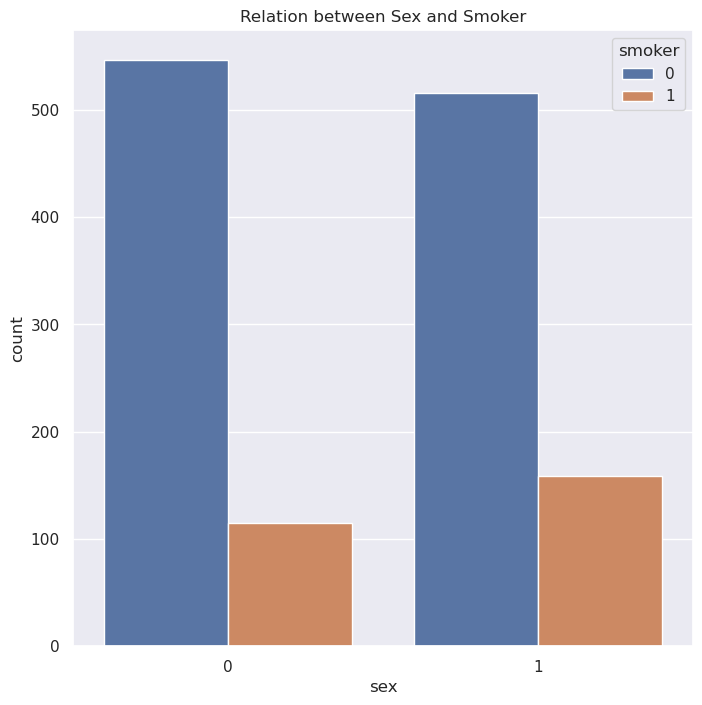

In [458]:
plt.figure(figsize=(8,8))
plt.title("Relation between Sex and Smoker")
sns.countplot(data=df, x='sex', hue='smoker')
plt.show()

**Males tend to smoke more as compared to females.**

### Corrletion of different features to the Insurance cost

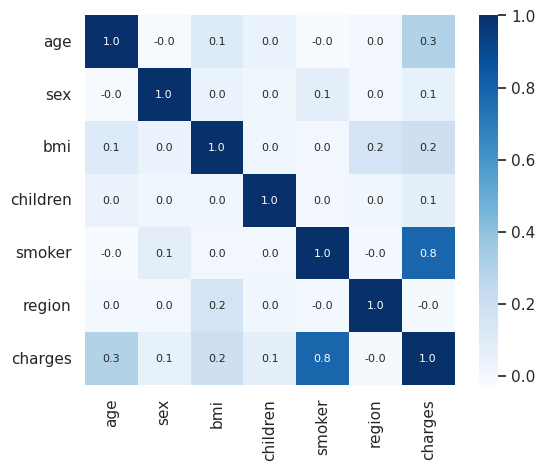

In [459]:
# correlation between different features
correlation = df.corr()
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

**From the heatmap it is evident that if the person smokes or not will affect the cost of insurance.**

## Splitting to features and target

In [460]:
X = df.drop(columns="charges", axis=1)
Y = df['charges']

# Model

## Splitting dataset into Testing and Training

In [461]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2) 

## Linear Regression

In [462]:
# loading instance of linear regression

model_a = LinearRegression()

### Training

In [463]:
model_a.fit(X_train, Y_train)

LinearRegression()

### Predictions

In [464]:
# prediction for training data
linear_training_predictions = model_a.predict(X_train)

# prediction for test data
linear_test_predictions = model_a.predict(X_test)

### Evaluation on Training Data

In [465]:
print(f"R2 Score: {round(r2_score(Y_train, linear_training_predictions), 2)}")
print(f"MSE: {round(mean_squared_error(Y_train, linear_training_predictions), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_train, linear_training_predictions), 2)}")

R2 Score: 0.76
MSE: 35101684.02
MAE: 4092.69


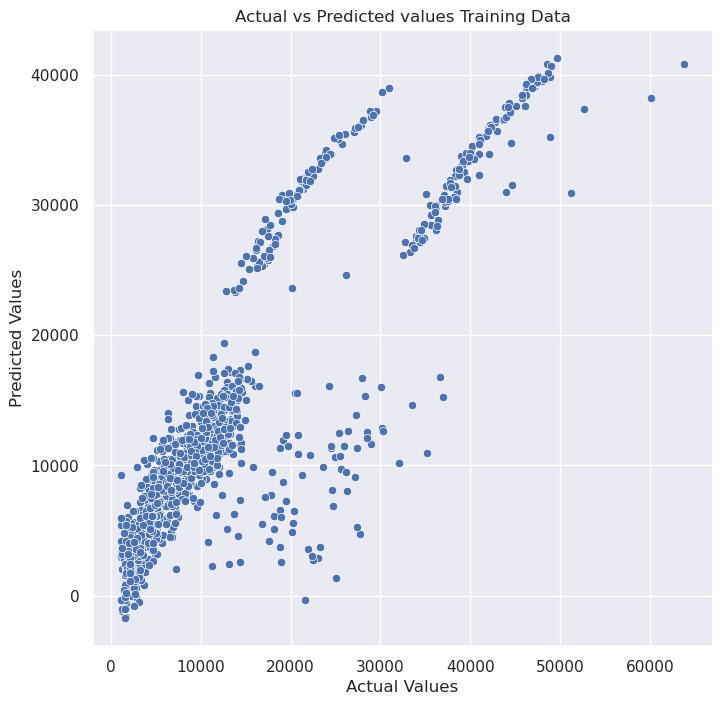

In [466]:
# visualizing the true values and prediction values
plt.figure(figsize=(8,8))
sns.scatterplot(x = Y_train, y = linear_training_predictions)
plt.title("Actual vs Predicted values Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

### Evaluation on Testing Data

In [467]:
print(f"R2 Score: {round(r2_score(Y_test, linear_test_predictions), 2)}")
print(f"MSE: {round(mean_squared_error(Y_test, linear_test_predictions), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_test, linear_test_predictions), 2)}")

R2 Score: 0.72
MSE: 42831000.31
MAE: 4475.11


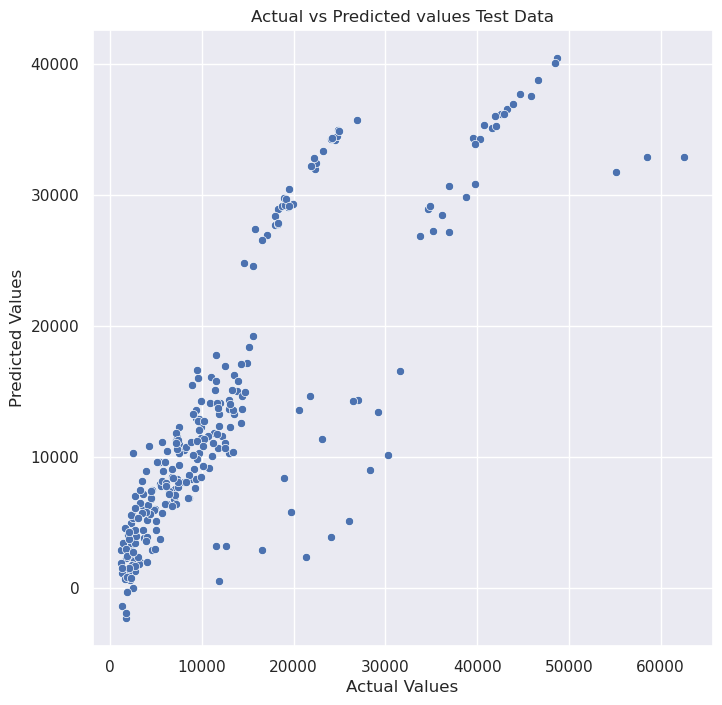

In [468]:
# visualizing the true values and prediction values
plt.figure(figsize=(8,8))
sns.scatterplot(x = Y_test, y = linear_test_predictions)
plt.title("Actual vs Predicted values Test Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

## XGBRegressor

In [469]:
# loading instance of xgbregressor

model_b = XGBRegressor()

### Training

In [470]:
model_b.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

### Predictions

In [471]:
# prediction for training data
xgb_training_predictions = model_b.predict(X_train)

# prediction for test data
xgb_test_predictions = model_b.predict(X_test)

### Evaluation on Training Data

In [472]:
print(f"R2 Score: {round(r2_score(Y_train, xgb_training_predictions), 2)}")
print(f"MSE: {round(mean_squared_error(Y_train, xgb_training_predictions), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_train, xgb_training_predictions), 2)}")

R2 Score: 1.0
MSE: 686947.49
MAE: 480.65


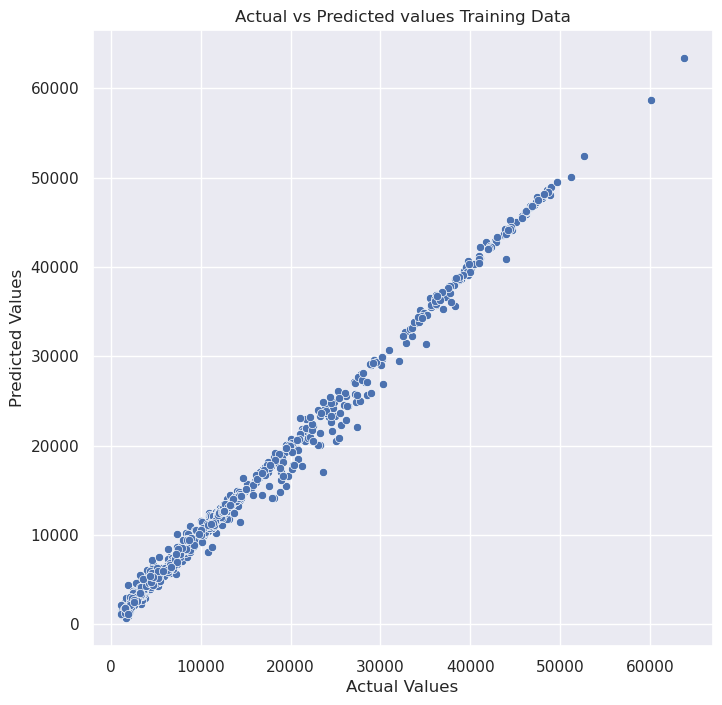

In [473]:
# visualizing the true values and prediction values
plt.figure(figsize=(8,8))
sns.scatterplot(x = Y_train, y = xgb_training_predictions)
plt.title("Actual vs Predicted values Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

### Evaluation on Testing Data

In [474]:
print(f"R2 Score: {round(r2_score(Y_test, xgb_test_predictions), 2)}")
print(f"MSE: {round(mean_squared_error(Y_test, xgb_test_predictions), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_test, xgb_test_predictions), 2)}")

R2 Score: 0.83
MSE: 25997232.83
MAE: 2806.61


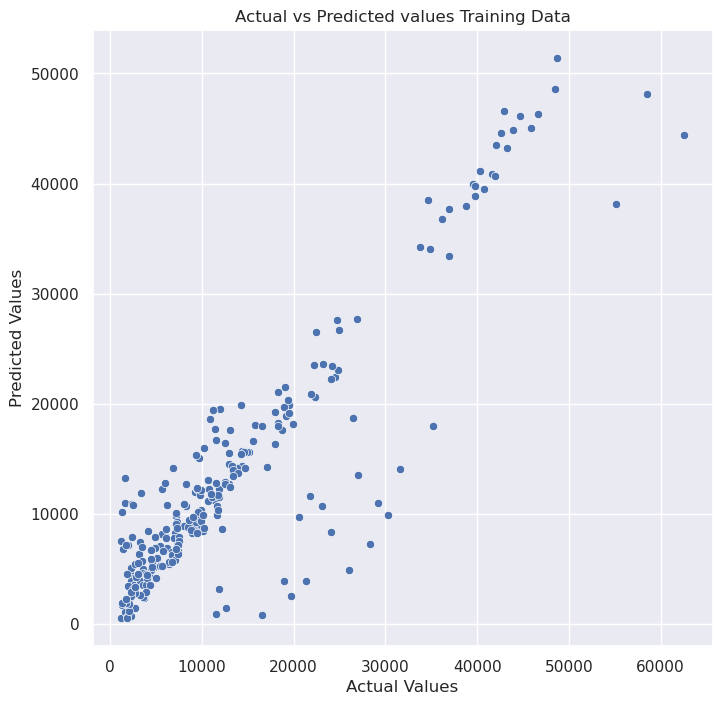

In [475]:
# visualizing the true values and prediction values
plt.figure(figsize=(8,8))
sns.scatterplot(x = Y_test, y = xgb_test_predictions)
plt.title("Actual vs Predicted values Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

## Export the model

In [476]:
# saving the model
model_path = "saved_model/medical_insurance_model.sav"
pickle.dump(model_b, open(model_path,"wb"))

# Results

We build 2 models one with Linear Regression and other with XGBRegressor and evaluated their score.

The scores for both the models for test data are mentioned below:

| Parameters | Linear Regression | XGBRegressor |
| --- | --- | --- |
| R2 Score | 0.72 | 0.83 |
| MSE | 42831000.31 | 25997232.83 |
| MAE | 4475.11 | 2806.61 |

We see a good improvement in all scores for XGBRegressor as compared to Linear Regression.